### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/data/coupons.csv'
data = pd.read_csv(file_path)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3177,Home,Alone,Sunny,55,6PM,Bar,1d,Male,50plus,Married partner,...,never,1~3,1~3,less1,1,0,0,1,0,0
2753,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,36,Single,...,never,less1,4~8,less1,1,0,0,1,0,0
11652,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Single,...,less1,less1,1~3,1~3,1,0,0,1,0,1


2. Investigate the dataset for missing or problematic data.

In [ ]:
# 1.chekc if there are any duplicate values
data.duplicated().sum()

74

In [ ]:
# Check for null/na values
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# there are 12576 nan for car column - we can drop this column
cleaned_data = data.drop(columns= 'car')
cleaned_data = cleaned_data.drop_duplicates()

print(data.shape)
print(cleaned_data.shape)

(12684, 26)
(12610, 25)


4. What proportion of the total observations chose to accept the coupon?



Y
1    56.76
0    43.24
Name: proportion, dtype: float64


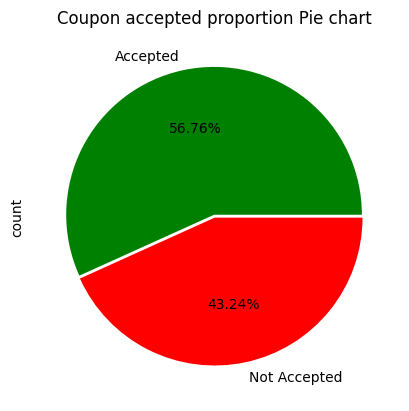

In [ ]:
cleaned_data['Y'].value_counts().plot(kind='pie', explode=[0.01,0.01], autopct='%1.2f%%', colors=['g','r'], labels=['Accepted', 'Not Accepted'])
plt.title('Coupon accepted proportion Pie chart')
print((cleaned_data["Y"].value_counts(normalize=True) * 100).round(2))

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

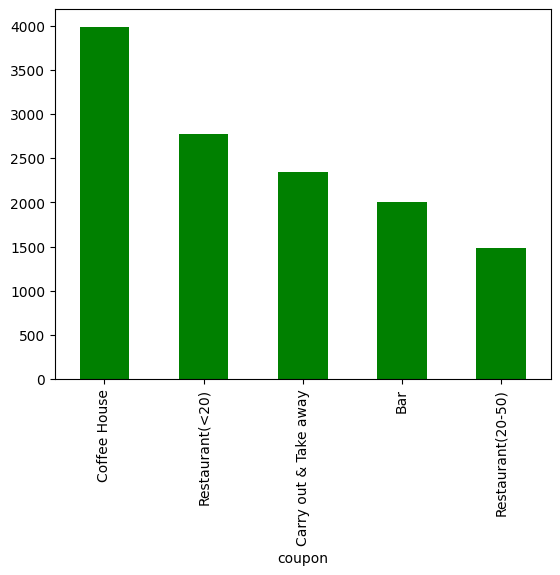

In [ ]:
#sns.boxplot(data, x="coupon")
cleaned_data['coupon'].value_counts().plot(kind='bar', color='green')


6. Use a histogram to visualize the temperature column.

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64


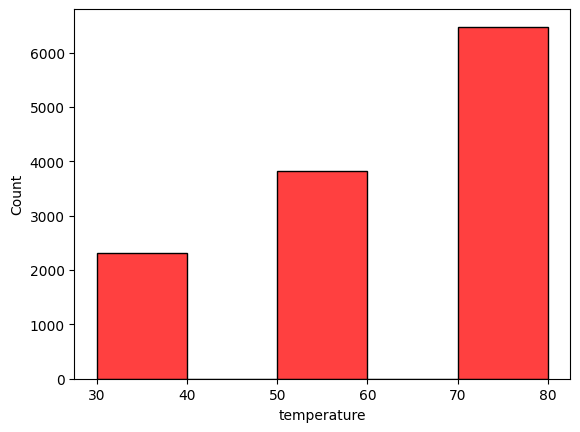

In [ ]:
sns.histplot(cleaned_data, x="temperature", color='red', bins=5)
print(cleaned_data['temperature'].value_counts())

In [ ]:
# Min coupon used - Bar
cleaned_data.groupby('coupon')['Y'].mean().idxmin()

# Coupons usage for data based on destinatio, weather, age and time
cleaned_data.groupby(['destination', 'weather', 'age', 'time'])['Y'].mean()

destination  weather  age      time
Home         Rainy    21       10PM    0.440000
                               6PM     0.483871
                      26       10PM    0.136364
                               6PM     0.533333
                      31       10PM    0.315789
                                         ...   
Work         Sunny    36       7AM     0.523148
                      41       7AM     0.518325
                      46       7AM     0.496000
                      50plus   7AM     0.475410
                      below21  7AM     0.616279
Name: Y, Length: 167, dtype: float64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupon_data = cleaned_data.query('coupon == "Bar"')
bar_coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
round( (bar_coupon_data.query("Y==1").shape[0] / bar_coupon_data.shape[0]) * 100, 2)

41.0

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Bar column values
bar_coupon_data['Bar'].value_counts()

,count
Bar,
never,830
less1,563
1~3,397
4~8,150
gt8,49


In [ ]:
# Dop duplicates
bar_coupon_data_no_dup = bar_coupon_data.drop_duplicates()

print( "Total duplicates: ", bar_coupon_data.shape[0] - bar_coupon_data_no_dup.shape[0] )
bar_coupon_data_no_dup.shape[0]

Total duplicates:  0


2010

In [ ]:
# Drop Bar=na records
bar_coupon_data_drop_na = bar_coupon_data_no_dup.dropna(subset=['Bar'])
bar_coupon_data_drop_na.shape[0]

1989

In [ ]:
# Customers went to bar <= 3


lessThan3Values = ['never', 'less1', '1~3']
moreThan3Values = ['4~8', 'gt8']
barCouponsLessThan3 = bar_coupon_data_drop_na.query("Bar in (@lessThan3Values)")
barCouponsMoreThan3 = bar_coupon_data_drop_na.query("Bar in (@moreThan3Values)")

barCouponsLessThan3Per = (barCouponsLessThan3['Y'].mean() * 100).round(2)
barCouponsMoreThan3Per = (barCouponsMoreThan3['Y'].mean() * 100).round(2)

print("Acceptance rate those who went to a bar '3 or fewer times' a month: ", barCouponsLessThan3Per)
print("Acceptance rate those who went to a bar 'more than 3 times' a month: ", barCouponsMoreThan3Per)


Acceptance rate those who went to a bar '3 or fewer times' a month:  37.04
Acceptance rate those who went to a bar 'more than 3 times' a month:  76.88


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
moreThanOnce = ['1~3','4~8', 'gt8']
bar_coupon_data_more_than_once = bar_coupon_data_drop_na.query("Bar in (@moreThanOnce)")

age_below_25 = ['below21', '21']
records_for_below_25_age = bar_coupon_data_more_than_once.query("age in (@age_below_25)")
records_for_above_25_age = bar_coupon_data_more_than_once.query("age not in (@age_below_25)")

#print(records_for_below_25_age["Y"].value_counts())
#print(records_for_above_25_age["Y"].value_counts())

acceptance_rate_below_25_age = (records_for_below_25_age['Y'].mean() * 100).round(2)
acceptance_rate_above_25_age = (records_for_above_25_age['Y'].mean() * 100).round(2)

print("Acceptance rate for drivers go to bar below 25 age: ", acceptance_rate_below_25_age)
print("Acceptance rate for drivers go to bar over 25 age: ",acceptance_rate_above_25_age)


Acceptance rate for drivers go to bar below 25 age:  67.05
Acceptance rate for drivers go to bar over 25 age:  69.52


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
occupation_few= ['farming', 'fishing', 'forestry']

data_no_kid = bar_coupon_data_more_than_once.query('passanger not in (["Kid(s)"])')
data_no_kid_no_few_occupations = data_no_kid.query('occupation not in (@occupation_few)')
result = (data_no_kid_no_few_occupations['Y'].mean() * 100).round(2)
print('Acceptance rate of drive without kid passanger and occupations other than [farming, fishing, or forestry] is: ', result)


Acceptance rate of drive without kid passanger and occupations other than [farming, fishing, or forestry] is:  71.32


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



1.Go to bars more than once a month, had passengers that were not a kid, and were not widowed 71.32
2.Go to bars more than once a month and are under the age of 30 64.14
3.Go to cheap restaurants more than 4 times a month and income is less than 50K 60.99


([0, 1, 2],
 [Text(0, 0, 'data_no_kid_no_widowed'),
  Text(1, 0, 'data_for_age_under_30'),
  Text(2, 0, 'visit_more_than_4_income_less_than_50k')])

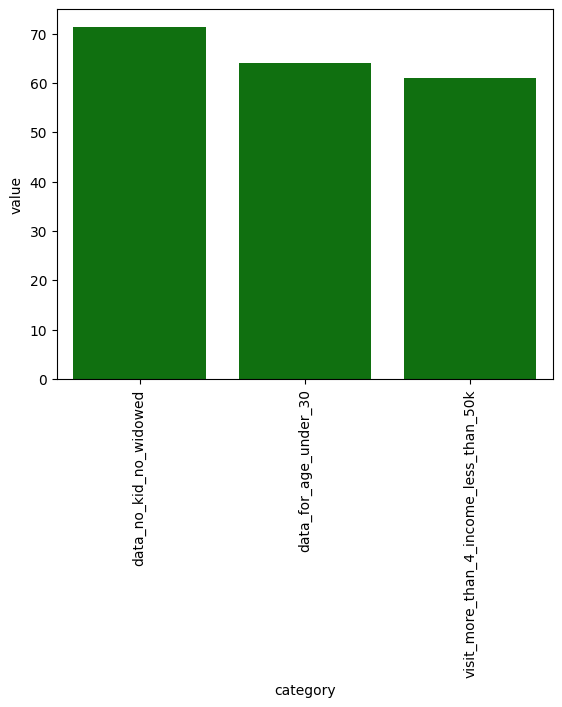

In [ ]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_no_kid_no_widowed = data_no_kid.query('maritalStatus not in (["Widowed"])')

# go to bars more than once a month and are under the age of 30
age_under_30 = ['below21', '21', '26']
data_for_age_under_30 = bar_coupon_data_more_than_once.query('age not in (@age_under_30)')

# go to cheap restaurants more than 4 times a month and income is less than 50K
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
more_than_4_visit = ['4~8', 'gt8']
visit_more_than_4 = cleaned_data.query('RestaurantLessThan20 in (@more_than_4_visit) or Restaurant20To50 in (@more_than_4_visit)')
visit_more_than_4_income_less_than_50k = visit_more_than_4.query('income in (@income_less_than_50k)')

# for constructing plot
val1 = (data_no_kid_no_widowed['Y'].mean() * 100).round(2)
val2 = (data_for_age_under_30['Y'].mean() * 100).round(2)
val3 = (visit_more_than_4_income_less_than_50k['Y'].mean() * 100).round(2)
print("1.Go to bars more than once a month, had passengers that were not a kid, and were not widowed", val1)
print("2.Go to bars more than once a month and are under the age of 30", val2)
print("3.Go to cheap restaurants more than 4 times a month and income is less than 50K", val3)

v1 = pd.DataFrame({'category': ['data_no_kid_no_widowed'], 'value': [val1]})
v2 = pd.DataFrame({'category': ['data_for_age_under_30'], 'value': [val2]})
v3 = pd.DataFrame({'category': ['visit_more_than_4_income_less_than_50k'], 'value': [val3]})

# Comina all the data
combined_df = pd.concat([v1, v2, v3], ignore_index=True)

#plot the bar graph
sns.barplot(data=combined_df, x='category', y='value', color='green')
# Rotate x-axis labels
plt.xticks(rotation=90)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:

#My observations are:
#Drivers acceptance rate is more who goes to a bar more than 3 times a month
#Drviers acceptance rate is more who goes to a bar more than once a month with there are no kid(s) as a passengers and are not widowed
#Drviers acceptance rate is more who goes to a bar more than once a month with there are no kid(s) as a passengers and are not into farming, fishing, forestry
#Based on my independent analysis drivers acceptance rate is more when they are driving to a places with no urgency and usually they are taking take away or Restaurent coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

       maritalStatus         Y
0           Divorced  0.529070
1    Married partner  0.542941
2             Single  0.605850
3  Unmarried partner  0.561299
4            Widowed  0.476923


<Axes: xlabel='maritalStatus', ylabel='Y'>

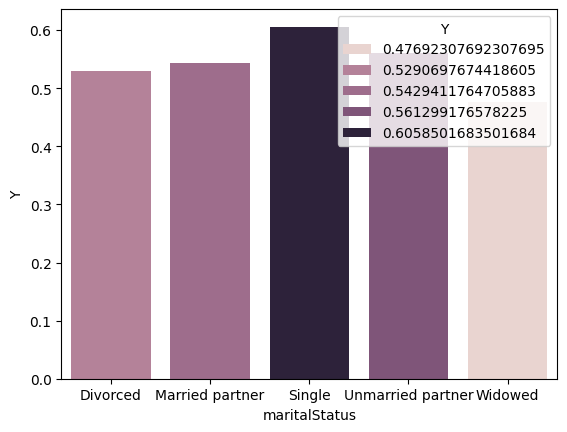

In [ ]:
# which category people are accepting more coupons - single
accepteddata = data.groupby("maritalStatus")["Y"].mean().reset_index()
print(accepteddata)
sns.barplot(data=accepteddata, x="maritalStatus", y="Y", hue="Y")

       age         Y
0       21  0.598191
1       26  0.595936
2       31  0.546346
3       36  0.535254
4       41  0.572736
5       46  0.575802
6   50plus  0.508949
7  below21  0.634369


<Axes: xlabel='age', ylabel='Y'>

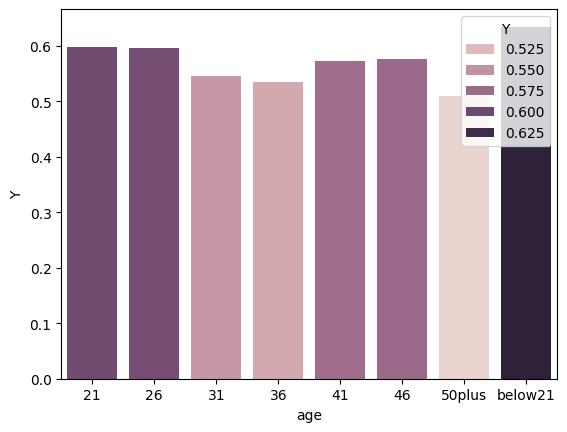

In [ ]:
# which age people are accepting more coupons - below 21
accepteddata = data.groupby("age")["Y"].mean().reset_index()
print(accepteddata)
sns.barplot(data=accepteddata, x="age", y="Y", hue="Y")

   gender         Y
0  Female  0.547228
1    Male  0.590799


<Axes: xlabel='gender', ylabel='Y'>

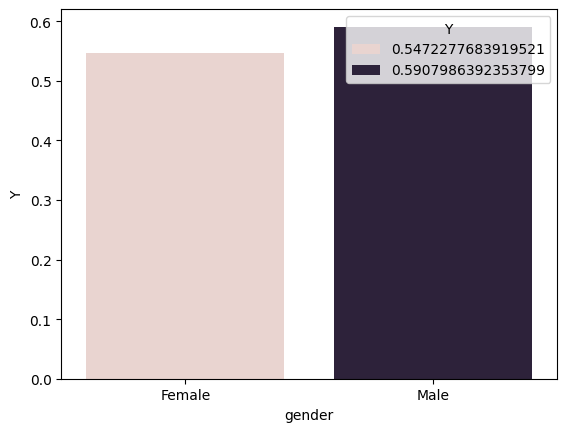

In [ ]:
# which gender people are accepting more coupons - male
accepteddata = data.groupby("gender")["Y"].mean().reset_index()
print(accepteddata)
sns.barplot(data=accepteddata, x="gender", y="Y", hue="Y")

       destination         Y
0             Home  0.506333
1  No Urgent Place  0.633774
2             Work  0.502212


<Axes: xlabel='destination', ylabel='Y'>

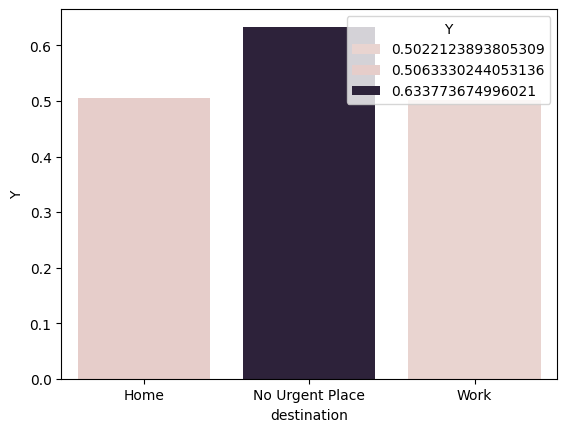

In [ ]:
# which destination people are accepting more coupons - no urgent place
accepteddata = data.groupby("destination")["Y"].mean().reset_index()
print(accepteddata)
sns.barplot(data=accepteddata, x="destination", y="Y", hue="Y")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Retired'),
  Text(1, 0, 'Legal'),
  Text(2, 0, 'Community & Social Services'),
  Text(3, 0, 'Arts Design Entertainment Sports & Media'),
  Text(4, 0, 'Education&Training&Library'),
  Text(5, 0, 'Installation Maintenance & Repair'),
  Text(6, 0, 'Farming Fishing & Forestry'),
  Text(7, 0, 'Unemployed'),
  Text(8, 0, 'Personal Care & Service'),
  Text(9, 0, 'Sales & Related'),
  Text(10, 0, 'Computer & Mathematical'),
  Text(11, 0, 'Business & Financial'),
  Text(12, 0, 'Life Physical Social Science'),
  Text(13, 0, 'Food Preparation & Serving Related'),
  Text(14, 0, 'Management'),
  Text(15, 0, 'Building & Grounds Cleaning & Maintenance'),
  Text(16, 0, 'Transportation & Material Moving'),
  Text(17, 0, 'Office & Administrative Support'),
  Text(18, 0, 'Student'),
  Text(19, 0, 'Production Occupations'),
  Text(20, 0, 'Architecture &

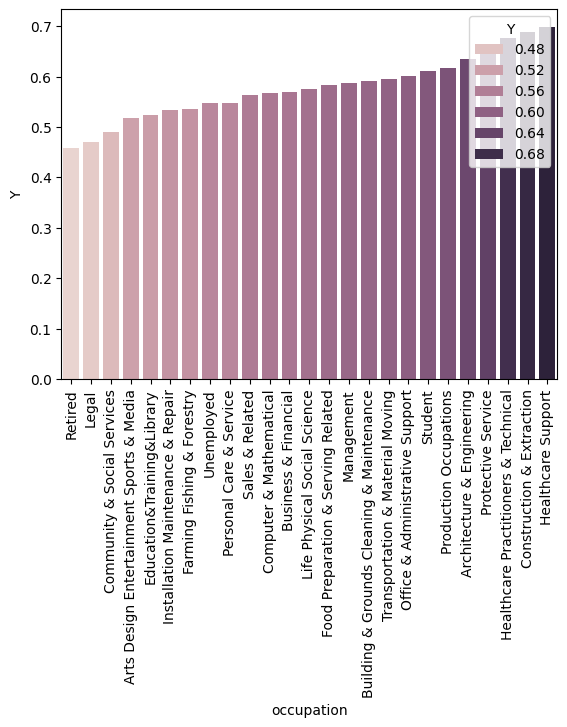

In [ ]:

# which occupation people are accepting more coupons - no urgent place
accepteddata = data.groupby("occupation")["Y"].mean().reset_index()
accepteddata = accepteddata.sort_values(by="Y")
sns.barplot(data=accepteddata, x="occupation", y="Y", hue="Y")
plt.xticks(rotation=90)

In [ ]:
# which destination people are accepting more coupons - no urgent place + Friends
accepteddata = data.groupby(["destination", "passanger"])["Y"].mean().reset_index()
print(accepteddata)
#sns.barplot(data=accepteddata, x="passanger", y="destination",  hue="Y")

       destination  passanger         Y
0             Home      Alone  0.504926
1             Home     Kid(s)  0.404412
2             Home    Partner  0.575290
3  No Urgent Place      Alone  0.628945
4  No Urgent Place  Friend(s)  0.673438
5  No Urgent Place     Kid(s)  0.520690
6  No Urgent Place    Partner  0.601716
7             Work      Alone  0.502212


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

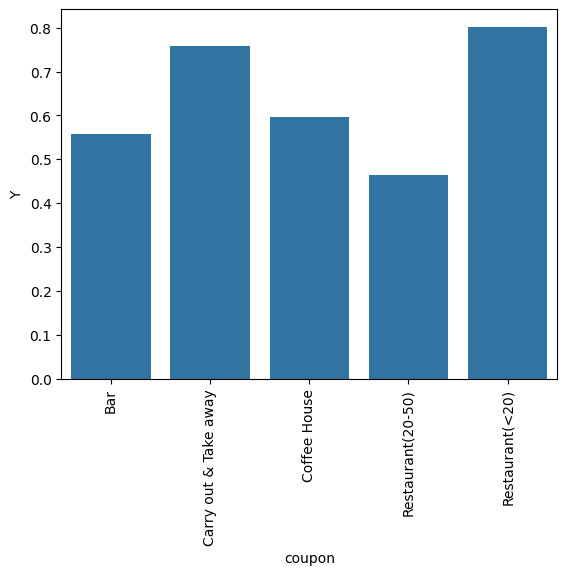

In [ ]:
a2 = data.query('destination == "No Urgent Place" and passanger == "Friend(s)"')
a3 = a2.groupby('coupon')["Y"].mean().reset_index()
sns.barplot(data=a3, x="coupon", y="Y")
plt.xticks(rotation=90)